# EDA -- Airbnb Madrid


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# Carga de Datos

In [2]:
listings = pd.read_csv("../data/listings.csv.gz")
calendar = pd.read_csv("../data/calendar.csv.gz")
reviews = pd.read_csv("../data/reviews.csv.gz")


In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,21853,https://www.airbnb.com/rooms/21853,20250612050748,2025-06-26,city scrape,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,https://www.airbnb.com/users/show/83531,Abdel,2010-02-21,"Madrid, Spain",EN-ES-FR\r\nEN\r\nHi everybody: I'm Abdel. I'm...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/83531/profile...,https://a0.muscache.com/im/users/83531/profile...,Aluche,2.0,2.0,"['email', 'phone']",t,t,"Madrid, Spain",Cármenes,Latina,40.40381,-3.74130,Private room in rental unit,Private room,1,1.0,1 bath,1.0,1.0,"[""Washer"", ""Hair dryer"", ""Coffee maker"", ""Oven...",$29.00,4,40,4.0,4.0,40.0,40.0,4.0,40.0,NaN,t,5,35,65,340,2025-06-26,33,0,0,164,0,0,0.0,2014-10-10,2018-07-15,4.58,4.72,4.56,4.75,4.82,4.21,4.67,NaN,f,2,0,2,0,0.25
1,30320,https://www.airbnb.com/rooms/30320,20250612050748,2025-06-27,previous scrape,Apartamentos Dana Sol,NaN,NaN,https://a0.muscache.com/pictures/336868/f67409...,130907,https://www.airbnb.com/users/show/130907,Dana,2010-05-24,"Madrid, Spain",Apartasol offers a network of several spacious...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/130907/profil...,https://a0.muscache.com/im/users/130907/profil...,Sol,3.0,6.0,"['email', 'phone']",t,f,NaN,Sol,Centro,40.41476,-3.70418,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,NaN,"[""TV with standard cable"", ""Air conditioning"",...",NaN,5,50,5.0,7.0,50.0,50.0,5.1,50.0,NaN,t,2,32,62,337,2025-06-27,172,0,0,160,0,0,NaN,2010-07-06,2022-09-26,4.63,4.71,4.88,4.82,4.78,4.90,4.69,NaN,f,3,3,0,0,0.94
2,30959,https://www.airbnb.com/rooms/30959,20250612050748,2025-06-27,previous scrape,Beautiful loft in Madrid Center,Beautiful Loft 60m2 size just in the historica...,NaN,https://a0.muscache.com/pictures/78173471/835e...,132883,https://www.airbnb.com/users/show/132883,Angela,2010-05-26,"Madrid, Spain",Estoy empezando en Airbnb y deseo que mis hués...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/132883/profil...,https://a0.muscache.com/im/users/132883/profil...,Embajadores,1.0,4.0,"['email', 'phone']",t,f,NaN,Embajadores,Centro,40.41259,-3.70105,Entire loft,Entire home/apt,2,NaN,1 bath,1.0,NaN,"[""Washer"", ""Breakfast"", ""Essentials"", ""Kitchen...",NaN,3,730,3.0,3.0,730.0,730.0,3.0,730.0,NaN,NaN,0,0,0,0,2025-06-27,8,0,0,0,0,0,NaN,2015-05-12,2017-05-30,4.38,4.14,4.38,4.63,4.63,4.88,4.25,NaN,f,1,1,0,0,0.06
3,40916,https://www.airbnb.com/rooms/40916,20250612050748,2025-06-26,previous scrape,Apartasol Apartamentos Dana,NaN,NaN,https://a0.muscache.com/p

In [4]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1529540,2025-06-26,t,NaN,NaN,2,1125
1,1529540,2025-06-27,t,NaN,NaN,2,1125
2,1529540,2025-06-28,t,NaN,NaN,2,1125
3,1529540,2025-06-29,t,NaN,NaN,2,1125
4,1529540,2025-06-30,t,NaN,NaN,2,1125


In [5]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,21853,21051116,2014-10-10,8506071,Pedro Abel,"Mi experiencia en casa de Adel fue buena, aunq..."
1,21853,21268157,2014-10-13,19062863,Olga,Adel is a very warm person and thoughtful! He...
2,21853,22527396,2014-11-09,6099461,Hugh,Adel is an exceptionally welcoming host. I was...
3,21853,22684525,2014-11-11,23357657,Sendy,"Adel fue muy amable, incluso el día de mi lleg..."
4,21853,22871843,2014-11-16,4072731,Nati,Abdel ha sido un magnífico anfitrión y la mejo...


In [6]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26004 entries, 0 to 26003
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26004 non-null  int64  
 1   listing_url                                   26004 non-null  object 
 2   scrape_id                                     26004 non-null  int64  
 3   last_scraped                                  26004 non-null  object 
 4   source                                        26004 non-null  object 
 5   name                                          26004 non-null  object 
 6   description                                   25104 non-null  object 
 7   neighborhood_overview                         11158 non-null  object 
 8   picture_url                                   26002 non-null  object 
 9   host_id                                       26004 non-null 

In [7]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9491474 entries, 0 to 9491473
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           float64
 4   adjusted_price  float64
 5   minimum_nights  int64  
 6   maximum_nights  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 506.9+ MB


In [8]:
calendar.isnull().sum()


listing_id              0
date                    0
available               0
price             9491474
adjusted_price    9491474
minimum_nights          0
maximum_nights          0
dtype: int64

In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1283059 entries, 0 to 1283058
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1283059 non-null  int64 
 1   id             1283059 non-null  int64 
 2   date           1283059 non-null  object
 3   reviewer_id    1283059 non-null  int64 
 4   reviewer_name  1283053 non-null  object
 5   comments       1282949 non-null  object
dtypes: int64(3), object(3)
memory usage: 58.7+ MB


# Limpieza y transformación

In [10]:
# Conversion de fecha a datetime
calendar['date'] = pd.to_datetime(calendar['date'],errors='coerce')
reviews['date'] = pd.to_datetime(reviews['date'],errors='coerce')
listings['host_since'] = pd.to_datetime(listings['host_since'],errors='coerce')
listings['first_review'] = pd.to_datetime(listings['first_review'],errors='coerce')
listings['last_review'] = pd.to_datetime(listings['last_review'],errors='coerce')
listings['last_scraped'] = pd.to_datetime(listings['last_scraped'],errors='coerce')
listings['calendar_last_scraped'] = pd.to_datetime(listings['calendar_last_scraped'],errors='coerce')

In [11]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26004 entries, 0 to 26003
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            26004 non-null  int64         
 1   listing_url                                   26004 non-null  object        
 2   scrape_id                                     26004 non-null  int64         
 3   last_scraped                                  26004 non-null  datetime64[ns]
 4   source                                        26004 non-null  object        
 5   name                                          26004 non-null  object        
 6   description                                   25104 non-null  object        
 7   neighborhood_overview                         11158 non-null  object        
 8   picture_url                                   26002 non-null  obje

In [12]:
listings.tail()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
25999,1440480926395443476,https://www.airbnb.com/rooms/1440480926395443476,20250612050748,2025-06-25,city scrape,Private Room Near Atocha,Cozy room in Madrid. Steps from the Royal Pala...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,699306333,https://www.airbnb.com/users/show/699306333,Sergio Matias,2025-06-04,NaN,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/0a5bc...,https://a0.muscache.com/im/pictures/user/0a5bc...,NaN,1.0,1.0,"['email', 'phone']",t,t,NaN,Acacias,Arganzuela,40.400235,-3.701100,Private room in rental unit,Private room,2,1.0,1 private bath,1.0,1.0,"[""Body soap"", ""Hair dryer"", ""Cleaning products...",$30.00,2,15,2.0,2.0,15.0,15.0,2.0,15.0,NaN,t,26,56,64,64,2025-06-25,0,0,0,64,0,0,0.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
26000,1440487269977127830,https://www.airbnb.com/rooms/1440487269977127830,20250612050748,2025-06-27,city scrape,Bahia - 3 bedrooms and balcony in Niño Jesús,Our mission is to empower individuals to immer...,The Niño Jesús neighborhood of Retiro is a pre...,https://a0.muscache.com/pictures/prohost-api/H...,346367515,https://www.airbnb.com/users/show/346367515,Ukio,2020-05-15,"Barcelona, Spain","At Ukio, we've redefined the concept of living...",within a few hours,100%,99%,f,https://a0.muscache.com/im/pictures/user/f790e...,https://a0.muscache.com/im/pictures/user/f790e...,Ibiza,903.0,915.0,"['phone', 'work_email']",t,t,"Madrid, Comunidad de Madrid, Spain",Niño Jesús,Retiro,40.410924,-3.675724,Entire rental unit,Entire home/apt,6,2.0,2 baths,3.0,3.0,"[""Washer"", ""Hair dryer"", ""Coffee maker"", ""Oven...",$140.00,31,330,31.0,31.0,330.0,330.0,31.0,330.0,NaN,t,0,30,60,300,2025-06-27,0,0,0,158,0,0,0.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,377,377,0,0,NaN
26001,1440501514773966682,https://www.airbnb.com/rooms/1440501514773966682,20250612050748,2025-06-26,city scrape,apartamento en plaza mayor,Beautiful apartment in Plaza Mayor. It consist...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,663724111,https://www.airbnb.com/users/show/663724111,Juan Vicente,2024-11-24,"Madrid, Spain",NaN,within a few hours,90%,89%,f,https://a0.muscache.com/im/pictures/user/User/...,https://a0.muscache.com/im/pictures/user/User/...,NaN,1.0,2.0,"['email', 'phone']",t,t,NaN,Sol,Centro,40.414901,-3.706317,Entire rental unit,Entire home/apt,3,1.0,1 bath,1.0,1.0,"[""Washer"", ""TV"", ""Paid parking on premises"", ""...",$77.00,1,365,1.0,1.0,365.0,365.0,1.0,365.0,NaN,t,16,44,74,349,2025-06-26,0,0,0,173,0,0,0.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
26002,144052643259243839

In [13]:
# Tenemos exceso de columnas, vamos a eliminar las que no nos interesan ya que no nos muestran información relevante y meten ruido. Id la eliminaremos mas adelante ya que sera la union entre tablas.
listings = listings.drop(['listing_url','scrape_id','last_scraped','source','picture_url',
    'host_url','host_thumbnail_url','host_picture_url','calendar_updated',
    'calendar_last_scraped','license','name','description','neighborhood_overview',
    'host_name','host_about','host_response_time','host_verifications',
    'host_has_profile_pic','neighbourhood','bathrooms_text',
    'minimum_minimum_nights','maximum_minimum_nights',
    'minimum_maximum_nights','maximum_maximum_nights','host_listings_count',
    'host_total_listings_count','host_identity_verified','host_neighbourhood',
    'picture_url'], axis=1)

In [14]:
listings.isnull().sum()


id                                                 0
host_id                                            0
host_since                                        16
host_location                                   8069
host_response_rate                              4728
host_acceptance_rate                            3985
host_is_superhost                                955
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                       0
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms                                       5939
bedrooms                                        2454
beds                                            5935
amenities                                          0
price                                         

In [15]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26004 entries, 0 to 26003
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            26004 non-null  int64         
 1   host_id                                       26004 non-null  int64         
 2   host_since                                    25988 non-null  datetime64[ns]
 3   host_location                                 17935 non-null  object        
 4   host_response_rate                            21276 non-null  object        
 5   host_acceptance_rate                          22019 non-null  object        
 6   host_is_superhost                             25049 non-null  object        
 7   neighbourhood_cleansed                        26004 non-null  object        
 8   neighbourhood_group_cleansed                  26004 non-null  obje

In [16]:
# Convertimos las columnas que son booleanas pero están como texto
listings['host_is_superhost'] = listings['host_is_superhost'].replace({'t': 'Yes', 'f': 'No'})
listings['has_availability'] = listings['has_availability'].replace({'t': 'Yes', 'f': 'No'})
listings['instant_bookable'] = listings['instant_bookable'].replace({'t': 'Yes', 'f': 'No'})
calendar['available'] = calendar['available'].replace({'t': 'Yes', 'f': 'No'})

In [17]:
# Convertimos las columnas que son numericas pero están como texto
listings['host_response_rate'] = listings['host_response_rate'].str.replace('%','').astype(float)
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.replace('%','').astype(float)
listings['price'] = listings['price'].str.replace('$','').str.replace(',','').astype(float)


In [18]:
# Vamos a rellenas los nulos
listings['host_since'] = listings['host_since'].fillna(listings['host_since'].mode()[0])
listings['host_location'] = listings['host_location'].fillna('Desconocido')
listings['host_response_rate'] = listings['host_response_rate'].fillna(listings['host_response_rate'].median())
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].fillna(listings['host_acceptance_rate'].median())
listings['host_is_superhost'] = listings['host_is_superhost'].fillna('Desconocido')
listings['bathrooms'] = listings['bathrooms'].fillna(listings['bathrooms'].mode()[0]) # La media no tiene sentido porque hay baños con 0.5, Cogemos la moda que mas se repite
listings['bedrooms'] = listings['bedrooms'].fillna(listings['bedrooms'].mode()[0])
listings['beds'] = listings['beds'].fillna(listings['beds'].mode()[0])
listings['price'] = listings['price'].fillna(listings['price'].median())
listings['has_availability'] = listings['has_availability'].fillna('Desconocido')
listings['first_review'] = listings['first_review'].fillna(listings['first_review'].mode()[0])
listings['last_review'] = listings['last_review'].fillna(listings['last_review'].mode()[0])
listings['review_scores_rating'] = listings['review_scores_rating'].fillna(listings['review_scores_rating'].median())
listings['review_scores_accuracy'] = listings['review_scores_accuracy'].fillna(listings['review_scores_accuracy'].median())
listings['estimated_occupancy_l365d'] = listings['estimated_occupancy_l365d'].fillna(listings['estimated_occupancy_l365d'].median())
listings['estimated_revenue_l365d'] = listings['estimated_revenue_l365d'].fillna(listings['estimated_revenue_l365d'].median())
listings['review_scores_cleanliness'] = listings['review_scores_cleanliness'].fillna(listings['review_scores_cleanliness'].median())
listings['review_scores_checkin'] = listings['review_scores_checkin'].fillna(listings['review_scores_checkin'].median())
listings['review_scores_communication'] = listings['review_scores_communication'].fillna(listings['review_scores_communication'].median())
listings['review_scores_location'] = listings['review_scores_location'].fillna(listings['review_scores_location'].median())
listings['review_scores_value'] = listings['review_scores_value'].fillna(listings['review_scores_value'].median())
listings['reviews_per_month'] = listings['reviews_per_month'].fillna(0)


In [19]:
calendar = calendar.drop(['price','adjusted_price'], axis=1)
reviews = reviews.drop(['id', 'reviewer_name', 'reviewer_id'], axis=1)


In [20]:
calendar.isnull().sum()

listing_id        0
date              0
available         0
minimum_nights    0
maximum_nights    0
dtype: int64

In [21]:
listings.isnull().sum()

id                                              0
host_id                                         0
host_since                                      0
host_location                                   0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
neighbourhood_cleansed                          0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
amenities                                       0
price                                           0
minimum_nights                                  0


In [22]:
# Mirarmos el rango intercuartilico para eliminar outliers
listings['price_transformed'] = np.log1p(listings['price'])
Quartil1 = listings['price'].quantile(0.25) # Valores que se encuentran por debajo del 25% de los datos
Quartil3 = listings['price'].quantile(0.75) # Valores que se encuentran por debajo del 75% de los datos
RangoIntQ = Quartil3 - Quartil1 # Valores que se encuentran entre el 25% y el 75% de los datos.
# Limites para considerar un valor como outlier
LimiteInferior = Quartil1 - 1.5 * RangoIntQ
LimiteSuperior = Quartil3 + 1.5 * RangoIntQ
print(LimiteInferior)
print(LimiteSuperior)

-5.5
214.5


In [23]:
print(listings[(listings['price'] < LimiteInferior) | (listings['price'] > LimiteSuperior)]['price'].count(), "de", listings['price'].count())

2277 de 26004


In [24]:
outliers = listings[(listings['price'] < LimiteInferior) | (listings['price'] > LimiteSuperior)]
print(outliers[['id', 'price']])


                        id   price
17                  628394   448.0
30                  684564   223.0
64                  751527   243.0
68                  260951   302.0
90                  793618   282.0
...                    ...     ...
25906  1436837885993308938  2178.0
25952  1439187703951455244  1200.0
25979  1439852314824491001   279.0
25982  1439889477929967973   225.0
25990  1440367781022713183   295.0

[2277 rows x 2 columns]


In [25]:
print("Precio mínimo: ", listings['price'].min(), ", Precio medio: ",listings['price'].median(),", Precio máximo: ",listings['price'].max())

Precio mínimo:  0.0 , Precio medio:  101.0 , Precio máximo:  32000.0


In [26]:
listings.duplicated().sum()

np.int64(0)

In [27]:
reviews.duplicated().sum()

np.int64(3)

In [28]:
# Eliminamos duplicados
reviews = reviews.drop_duplicates()
reviews.duplicated().sum()

np.int64(0)

In [29]:
calendar.duplicated().sum()

np.int64(0)

In [30]:
listings.describe().T

,count,mean,min,25%,50%,75%,max,std
id,26004.0,694992069838542976.0,21853.0,38873573.0,876701137303263872.0,1191379600219370240.0,1441028226979579648.0,556474487971353408.0
host_id,26004.0,271350707.726927,31622.0,57722905.25,240975048.0,460391145.0,700514774.0,215275793.535663
host_since,26004,2019-02-15 15:23:40.396862208,2009-08-14 00:00:00,2016-02-13 00:00:00,2019-02-06 00:00:00,2022-05-22 00:00:00,2025-06-10 00:00:00,NaN
host_response_rate,26004.0,92.883326,0.0,98.0,100.0,100.0,100.0,19.702965
host_acceptance_rate,26004.0,85.802992,0.0,88.0,98.0,100.0,100.0,26.021162
latitude,26004.0,40.422077,40.3314,40.40941,40.420788,40.432593,40.53553,0.023706
longitude,26004.0,-3.693515,-3.83206,-3.70746,-3.700781,-3.68318,-3.545904,0.028292
accommodates,26004.0,3.111252,1.0,2.0,2.0,4.0,16.0,1.89664
bathrooms,26004.0,1.244751,0.0,1.0,1.0,1.0,19.0,0.6363
bedrooms,26004.0,1.394478,0.0,1.0,1.0,2.0,25.0,0.95898


In [32]:
listings.to_csv("../output/listings.csv", index=False)
calendar.to_csv("../output/calendar.csv", index=False)
reviews.to_csv("../output/reviews.csv", index=False)

# Gráficos

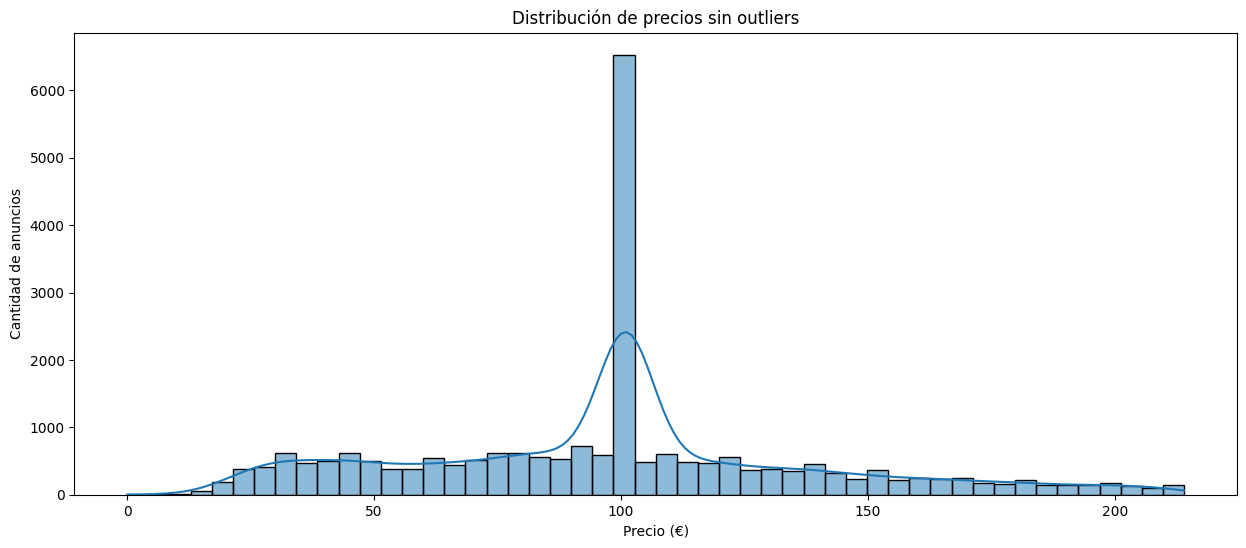

In [ ]:
precios_sin_outliers = listings[(listings['price'] >= LimiteInferior) & (listings['price'] <= LimiteSuperior)]

plt.figure(figsize=(15,6))
sns.histplot(precios_sin_outliers['price'], bins=50, kde=True)
plt.title('Distribución de precios sin outliers')
plt.xlabel('Precio (€)')
plt.ylabel('Cantidad de anuncios')
plt.show()


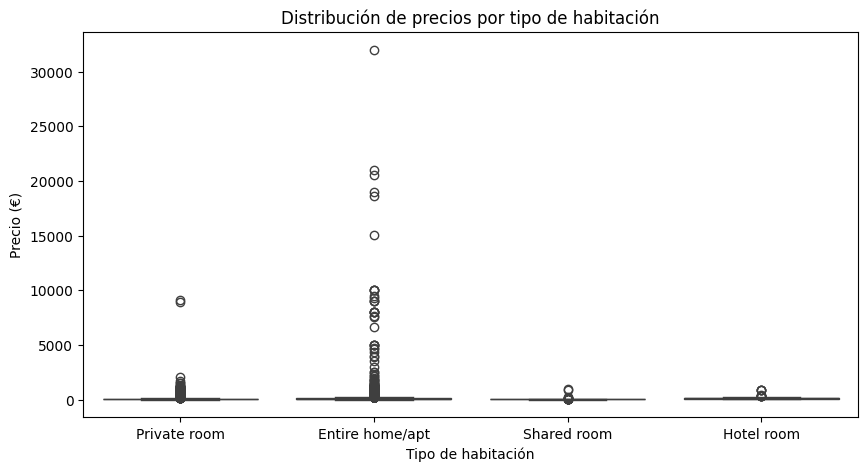

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='room_type', y='price', data=listings)
plt.title('Distribución de precios por tipo de habitación')
plt.xlabel('Tipo de habitación')
plt.ylabel('Precio (€)')
plt.show()

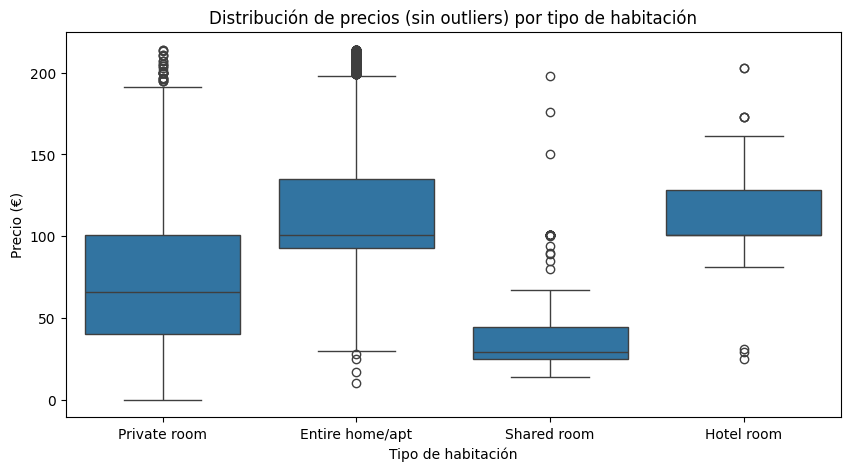

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='room_type', y='price', data=precios_sin_outliers)
plt.title('Distribución de precios (sin outliers) por tipo de habitación')
plt.xlabel('Tipo de habitación')
plt.ylabel('Precio (€)')
plt.show()

# Aqui vemos la distribución de precios por tipo de habitación sin outliers. Vemos que los precios son mas bajos en habitaciones 
# compartidas y mas altos en casas completas.

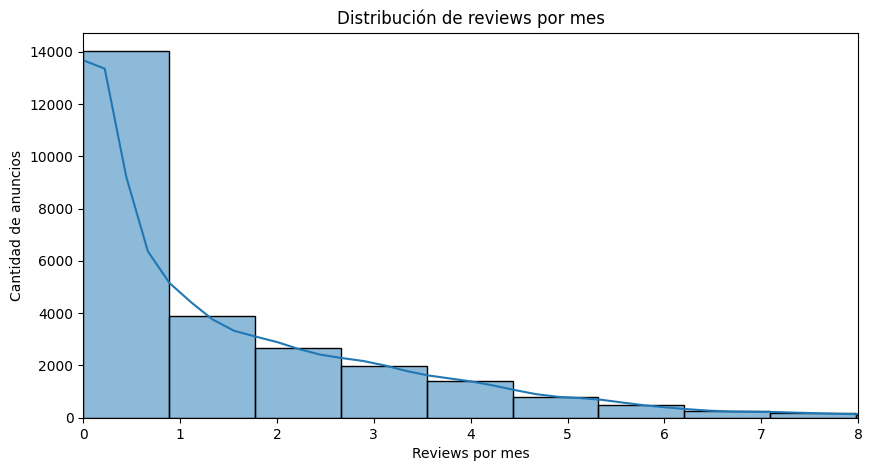

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(listings['reviews_per_month'], bins =50, kde=True)
plt.xlim(0,8) # Limitamos el eje x para ver mejor la distribución, ya que hay muy pocos anuncios con mas de 8 reviews al mes.
plt.title('Distribución de reviews por mes')
plt.xlabel('Reviews por mes')
plt.ylabel('Cantidad de anuncios')
plt.show()

# Estamos ante una distribución sesgada a la derecha, con muchos anuncios que no reciben reviews y pocos que reciben muchas reviews al mes.
# El xlim me ayuda ya que quito los outliers y me centro en la mayoría de los datos.

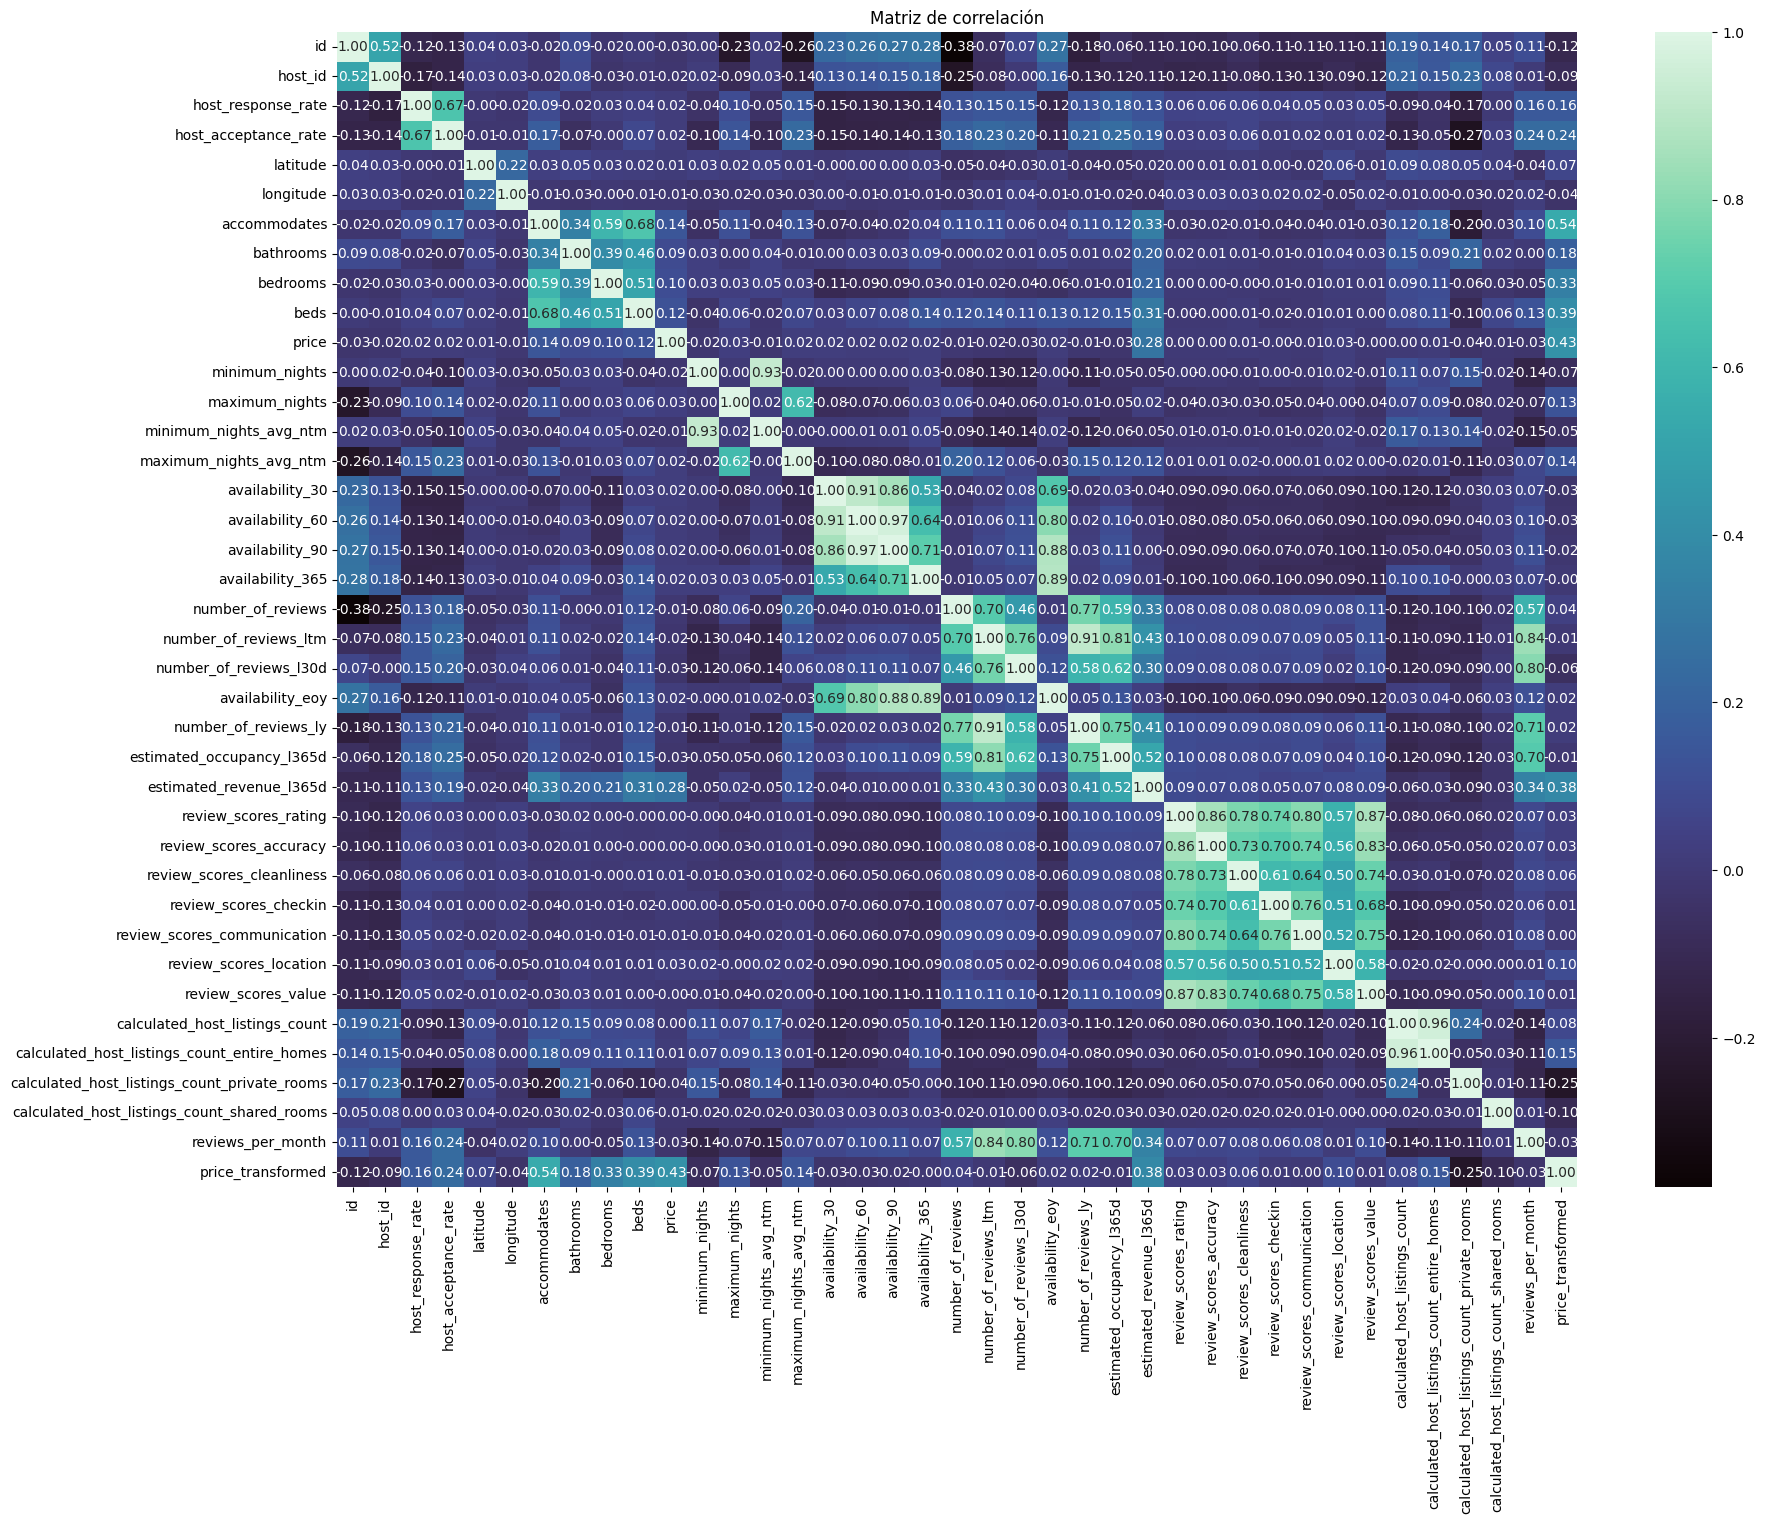

In [ ]:
numeric_cols = listings.select_dtypes(include=['float64','int64']).columns
corr = listings[numeric_cols].corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='mako')
plt.title('Matriz de correlación')
plt.show()